### CS5304 Data Science - Project Part 1
<break>Romoli Bakshi (rb636), Advika Nigam (an556)
<break>April 16, 2018

### I. Import the Data

In [218]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

usComments = pd.read_csv('youtube/UScomments.csv', error_bad_lines=False)
usVideos = pd.read_csv('youtube/USvideos.csv', error_bad_lines=False)
usVideos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/RomoliBakshi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### II. Data Exploration

For a baseline model, let's predict the number of total views a video will receive, given features related to its content -- the features we will use include:

- title
- channel_title
- category_id
- tags

In [82]:
# Get category information
categoryInfo = pd.read_json('youtube/US_category_id.json')['items']
ids = list(map(lambda entry: entry['id'], categoryInfo))
titles = list(map(lambda entry: entry['snippet']['title'], categoryInfo))
categories = dict(zip(ids, titles))

# Pick features and output columns we will work with
usContentData = usVideos[['title', 'channel_title', 'category_id', 'tags', 'views']]

# Add in category information to data
usContentData['category'] = list(map(lambda categoryId: categories[str(categoryId)], usContentData['category_id']))
usContentData

/Users/RomoliBakshi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,title,channel_title,category_id,tags,views,category
0,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,Entertainment
1,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,Science & Technology
2,My Response,PewDiePie,22,[none],5845909,People & Blogs
3,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,Science & Technology
4,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,Comedy
5,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,Film & Animation
6,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,Comedy
7,iPhone X Impressions & Hands On!,Marques Brownlee,28,iPhone X|iphone x|iphone 10|iPhone X impressio...,1728614,Science & Technology
8,ATTACKED BY A POLICE DOG!!,RomanAtwoodVlogs,22,Roman Atwood|Roman|Atwood|roman atwood vlogs|f...,1338533,People & Blogs
9,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,Film & Animation


In [90]:
len(set(trainIndices))

6393

In [89]:
# Split into train and test sets
noTotalSamples = len(usContentData)
noTrainSamples = math.floor(noTotalSamples * 0.8)
noTestSamples = noTotalSamples - noTrainSamples

print('No. of total samples: ', str(noTotalSamples))
print('No. of features: ', str(usContentData.shape[1]))

# Split into training and testing
trainIndices = np.random.choice(list(range(noTotalSamples)), size=noTrainSamples, replace=False)
testIndices = filter(lambda index: index not in trainIndices, list(range(noTotalSamples)))
trainData = usContentData.loc[trainIndices]
testData = usContentData.loc[testIndices]

print('No. of train samples: ', str(len(trainData)))
print('No. of test samples: ', str(len(testData)))

No. of total samples:  7992
No. of features:  6
No. of train samples:  6393
No. of test samples:  1599


In [104]:
# View videos in order of descending views
top25Percentile = trainData.sort_values(by=['views'], ascending=False).head(n=math.floor(noTrainSamples/4))
top25Percentile.head()

,title,channel_title,category_id,tags,views,category
1907,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,Music
177,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,Dusk Till Dawn|Pop|RCA Records Label|ZAYN feat...,36323498,Music
7135,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,Entertainment
6917,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,32512343,Entertainment
1995,Shakira - Perro Fiel (Official Video) ft. Nick...,shakiraVEVO,10,Shakira ft. Nicky Jam|Shakira ft. Nicky Jam Mu...,32136948,Music


In [106]:
print('Mean number of views: ', trainData['views'].mean())
print('Median number of views: ', trainData['views'].median())
print('\nCategory Count: \n', trainData['category'].value_counts())
print('\nCategory Count in top 25th Percentile: \n', top25Percentile['category'].value_counts())

Mean number of views:  948713.4270295636
Median number of views:  312931.0

Category Count: 
 Entertainment            1292
Music                     996
People & Blogs            714
Howto & Style             698
Comedy                    605
News & Politics           496
Science & Technology      392
Sports                    337
Film & Animation          303
Education                 258
Pets & Animals             95
Autos & Vehicles           91
Gaming                     60
Travel & Events            43
Nonprofits & Activism      11
Shows                       2
Name: category, dtype: int64

Category Count in top 25th Percentile: 
 Entertainment            364
Comedy                   289
Music                    228
People & Blogs           189
Science & Technology     120
Film & Animation         111
Howto & Style            102
News & Politics           59
Sports                    42
Education                 36
Pets & Animals            22
Autos & Vehicles          16
Gaming 

### III. Data Preprocessing

In [130]:
# Get all unique tags
uniqueTags = set()

for index, row in trainData.iterrows():
    uniqueTags = uniqueTags.union(row['tags'].split('|'))
    
uniqueTags = list(uniqueTags)
print('Number of unique tags: ', len(uniqueTags))

Number of unique tags:  23227


In [132]:
# Convert tags for each video to binary vector representation over all unique tags
tagLists = []
for index, row in trainData.iterrows():
    tagsFound = row['tags'].split('|')
    tagLists.append(list(map(lambda tag: int(tag in tagsFound), uniqueTags)))

# Create bag of tags representation of each video
bagOfTags = pd.DataFrame(tagLists, columns=uniqueTags)
bagOfTags.head()

,,liza therapy,b1,skrillex,tmv,best and worst sunscreen for dark skin,south florida,Classroom,steampunk wedding cake,новости,...,found iphone underwater,soda,h3h3 buzzfeed,france inter,2D animation,one,keith leak jr,aaron carter hiv test,birdie joe,Jack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
bagOfTags.index = trainData.index
bagOfTags.head()

,,liza therapy,b1,skrillex,tmv,best and worst sunscreen for dark skin,south florida,Classroom,steampunk wedding cake,новости,...,found iphone underwater,soda,h3h3 buzzfeed,france inter,2D animation,one,keith leak jr,aaron carter hiv test,birdie joe,Jack
7632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Create binary representations of unique categories
uniqueCategories = list(categories.values())
categoryLists = []

for index, row in trainData.iterrows():
    categoryLists.append(list(map(lambda category: int(category in row['category']), uniqueCategories)))
    

In [161]:
bagOfCategories = pd.DataFrame(categoryLists, columns=uniqueCategories)
bagOfCategories.index = trainData.index
bagOfCategories.head()

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
7632,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1148,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4273,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4310,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# Get numbers of train and validation samples
noInnerTrainSamples = math.floor(len(trainData)*0.8)
noValidationSamples = len(trainData) - noInnerTrainSamples

# Split into inner train and validation
innerTrainIndices = np.random.choice(trainData.index.tolist(), size=noInnerTrainSamples, replace=False)
validationIndices = list(filter(lambda index: index not in innerTrainIndices, trainData.index.tolist()))
innerTrainData = trainData.loc[innerTrainIndices]
validationData = trainData.loc[validationIndices]

print('No. of inner train samples: ', str(len(innerTrainData)))
print('No. of validation samples: ', str(len(validationData)))

No. of inner train samples:  5114
No. of validation samples:  1279


### IV. Baseline Model

In [183]:
trainX = bagOfTags.loc[innerTrainIndices]
trainY = trainData.loc[innerTrainIndices]['views']
validationX = bagOfTags.loc[validationIndices]
validationY = trainData.loc[validationIndices]['views']

trainX.head()

,,liza therapy,b1,skrillex,tmv,best and worst sunscreen for dark skin,south florida,Classroom,steampunk wedding cake,новости,...,found iphone underwater,soda,h3h3 buzzfeed,france inter,2D animation,one,keith leak jr,aaron carter hiv test,birdie joe,Jack
6925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
trainY.head()

6925    134947
894     216512
6747    251907
3042    125360
3929     93878
Name: views, dtype: int64

In [193]:
# Linear Regression - get predictions
model = LinearRegression()
model.fit(trainX, trainY)
predictions = model.predict(validationX)

MSE:  5.806538485066634e+37
R2:  0.559232424630131


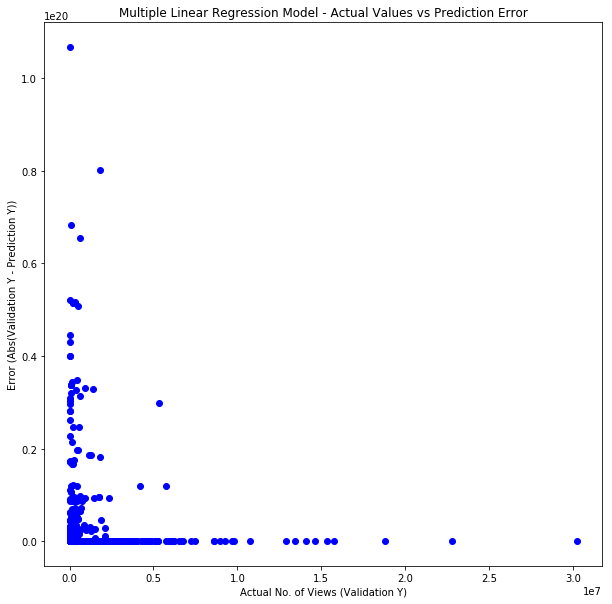

In [234]:
# Calculate error metrics
mse = mean_squared_error(validationY, predictions)

print('MSE: ', mse)
print('R2: ', model.score(trainX, trainY))

# Plot views vs. view prediction error
error = list(map(lambda val: abs(val), validationY - predictions))
plt.figure(figsize=(10,10))
plt.scatter(validationY, error, color='blue')  
plt.title('Multiple Linear Regression Model - Actual Values vs Prediction Error')
plt.xlabel('Actual No. of Views (Validation Y)')
plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
plt.show()

In [239]:
mlp = MLPRegressor(max_iter=500)
mlp.fit(trainX, trainY)
mlpPredictions = mlp.predict(validationX)

# Calculate error metrics
mse = mean_squared_error(validationY, mlpPredictions)
r2 = mlp.score(trainX, trainY)

print('MSE - Linear Regression: ', mse)
print('R2 - Linear Regression: ', r2)

MSE - Linear Regression:  4353792801913.5044
R2 - Linear Regression:  -0.18815543028094253


In [237]:
print('First 10 actual view values: \n', validationY[:10])
print('\nFirst 10 predictions for Linear Regression: \n', predictions[:10])
print('\nFirst 10 predictions for MLP Regressor: \n', mlpPredictions[:10])

First 10 actual view values: 
 1148    146466
4142     15157
4374     52347
7230     53013
3315     47042
6426     48922
4946    645693
1953     81663
2332    101750
3339      9375
Name: views, dtype: int64

First 10 predictions for Linear Regression: 
 [ 1074688.   934400. -1167872.  2771456. -3744768.   179712.  1075712.
  -127488.   398336.   111616.]

First 10 predictions for MLP Regressor: 
 [ 79529.09875509  64424.67386249 118230.04853756 183587.85469912
  66521.15492474 150459.90525532 137837.18546649  26010.49357114
  54418.98733248  14599.36392806]


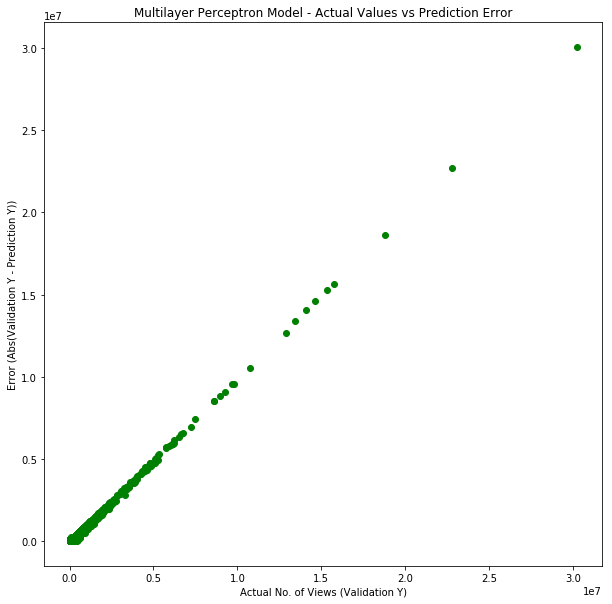

In [235]:
# Plot views vs. view prediction error
error = list(map(lambda val: abs(val), validationY - mlpPredictions))
plt.figure(figsize=(10,10)) 
plt.scatter(validationY, error, color='green')
plt.title('Multilayer Perceptron Model - Actual Values vs Prediction Error')
plt.xlabel('Actual No. of Views (Validation Y)')
plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
plt.show()